# Figs of WMT tendency terms
## Table Of Contents: <a class="anchor" id="top"> </a>
* [Annual-mean global fig of each term](#first-bullet)
* [Global timeseries of each term](#second-bullet)

> Note: the time dimension is only for first 6 months of CESM data

In [1]:
from dask_gateway import Gateway
g = Gateway()
cluster = g.connect(g.list_clusters()[0].name)
client = cluster.get_client()

In [2]:
client

Connection method: Cluster object,Cluster type: dask_gateway.GatewayCluster
Dashboard: /services/dask-gateway/clusters/staging.bb72718d65ad4e7aadbaf86fa8bedeaf/status,


In [36]:
cluster.close()
client.close()

In [5]:
import xarray as xr
import numpy as np
import dask.array as dsa
import matplotlib.pyplot as plt
import fastjmd95
import pop_tools
import gcsfs
from xhistogram.xarray import histogram

In [4]:
from intake import open_catalog
url = "https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/CESM_POP.yaml"
cat = open_catalog(url)
ds  = cat["CESM_POP_hires_control"].to_dask()

In [6]:
import json
with open('/home/jovyan/chapter2/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

histograms = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CESM/datasets/histograms.zarr'))
histograms

<xarray.Dataset>
Dimensions:          (time: 182, rho0_bin: 1499)
Coordinates:
  * rho0_bin         (rho0_bin) float64 1.015e+03 1.015e+03 ... 1.03e+03
  * time             (time) object 0046-01-02 00:00:00 ... 0046-07-02 00:00:00
Data variables:
    OMEGA_cabbeling  (time, rho0_bin) float32 dask.array<chunksize=(91, 750), meta=np.ndarray>
    OMEGA_rho        (time, rho0_bin) float32 dask.array<chunksize=(91, 750), meta=np.ndarray>
    OMEGA_sss        (time, rho0_bin) float32 dask.array<chunksize=(91, 750), meta=np.ndarray>
    OMEGA_sst        (time, rho0_bin) float32 dask.array<chunksize=(91, 750), meta=np.ndarray>

# 1) Annual-mean global fig <a class='anchor' id='first-bullet'> </a>
(use logarithmic scale on y-axis)

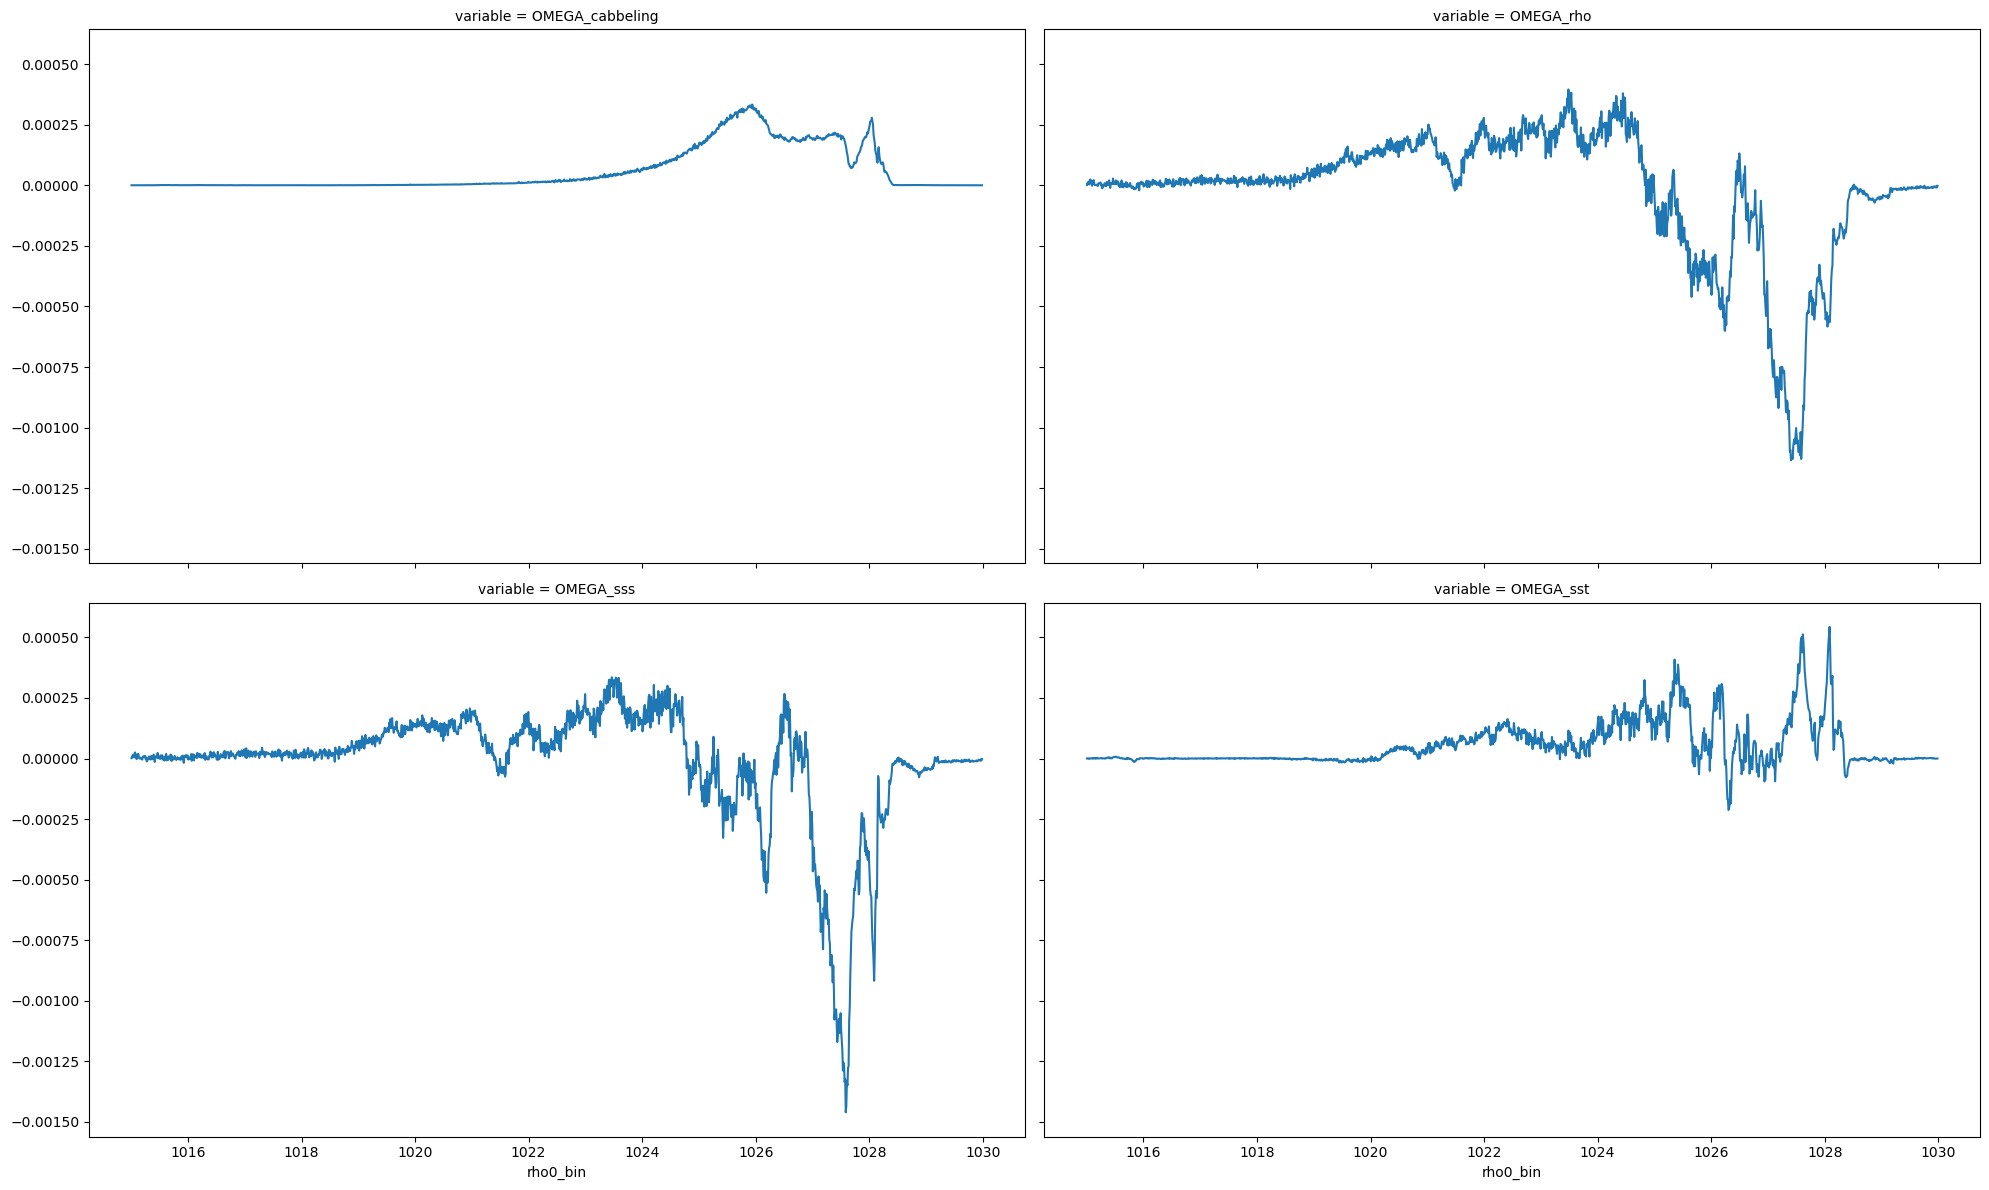

In [10]:
histograms.mean('time').to_array().plot(col='variable', col_wrap=2, figsize=(20, 12))

# 2) Global timeseries fig <a class='anchor' id='second-bullet'> </a>

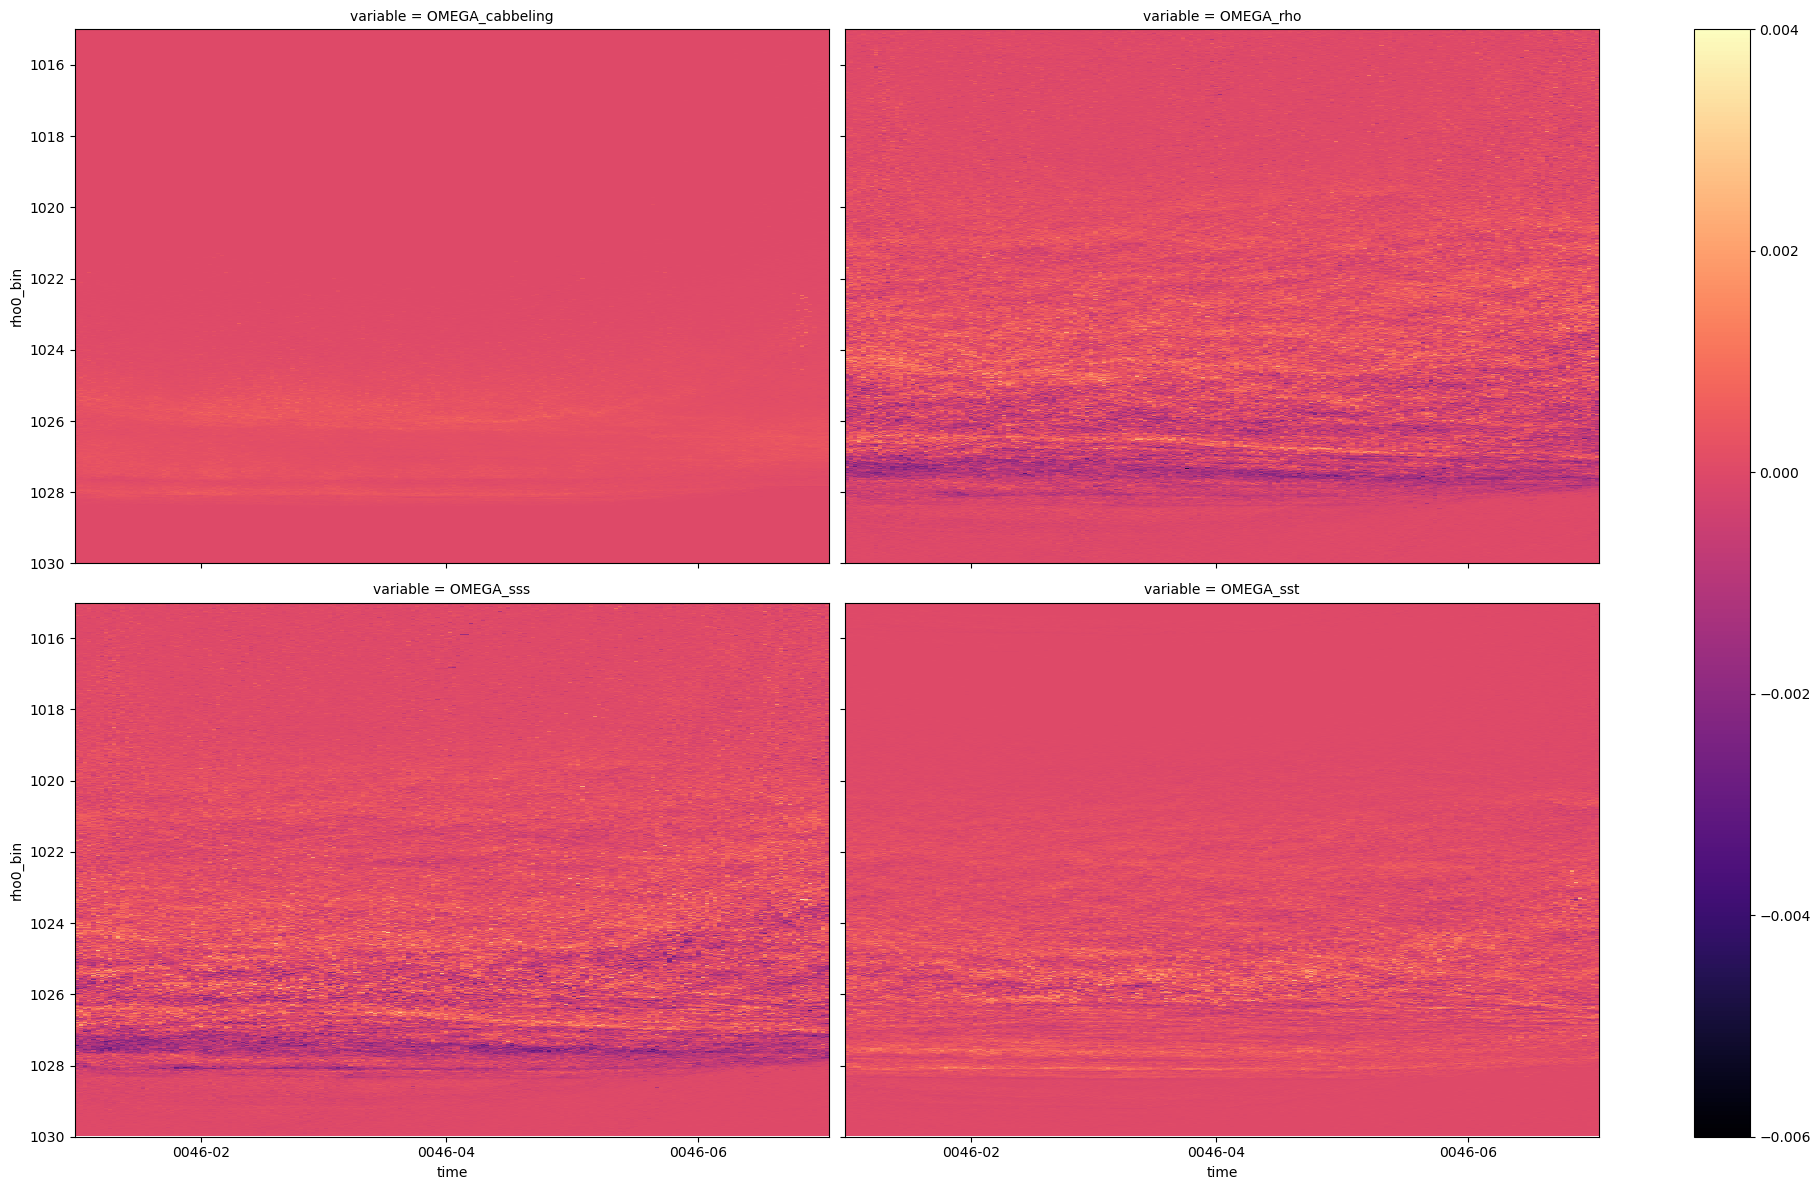

In [21]:
histograms.to_array().T.plot(col='variable', col_wrap=2, figsize=(20, 12), 
                             vmin=-0.006, vmax=0.004, cmap='magma')
plt.ylim(1030, 1015);

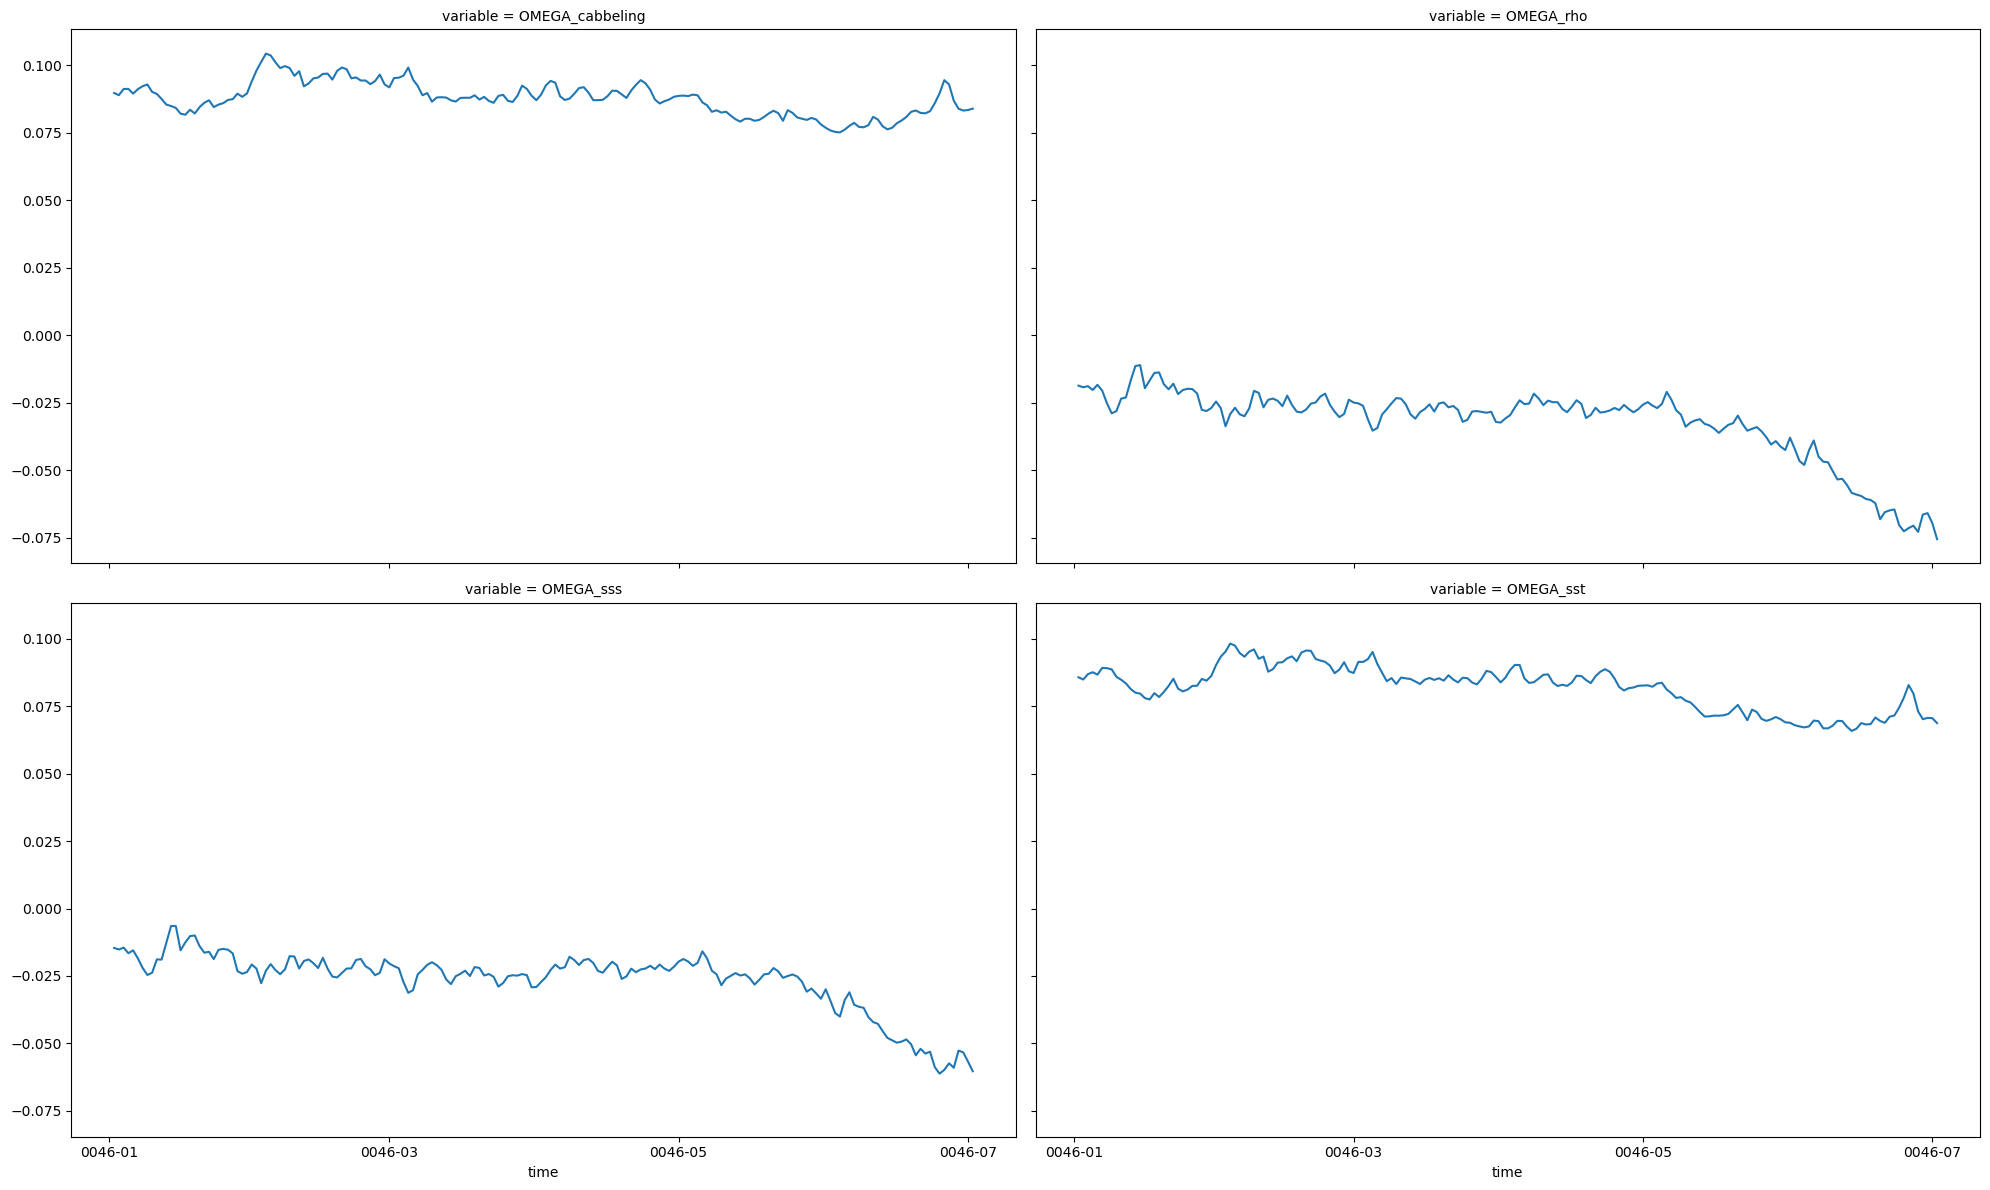

2022-09-18 22:03:46,490 - distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client
Exception in callback None()
handle: <Handle cancelled>
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/tornado/iostream.py", line 1391, in _do_ssl_handshake
    self.socket.do_handshake()
  File "/srv/conda/envs/notebook/lib/python3.9/ssl.py", line 1310, in do_handshake
    self._sslobj.do_handshake()
ssl.SSLEOFError: EOF occurred in violation of protocol (_ssl.c:1129)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/asyncio/events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 189, in _handle_events
    handler_func(fileobj, events)
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/t

In [27]:
histograms.sum('rho0_bin').to_array().plot(col='variable', col_wrap=2, figsize=(20, 12));

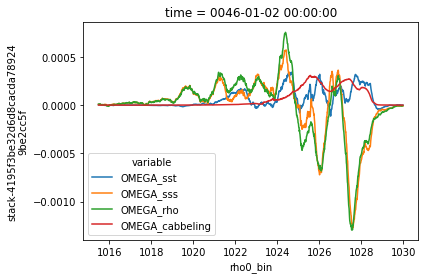

In [44]:
histograms.isel(time=0).to_array().rolling(rho0_bin=50).mean().plot.line(hue='variable');

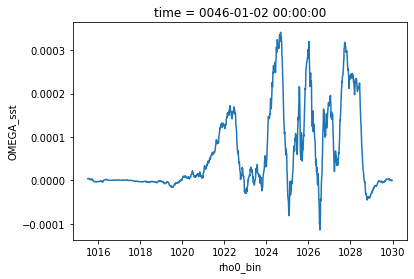

In [45]:
histograms.isel(time=0).OMEGA_sst.rolling(rho0_bin=50).mean().plot();

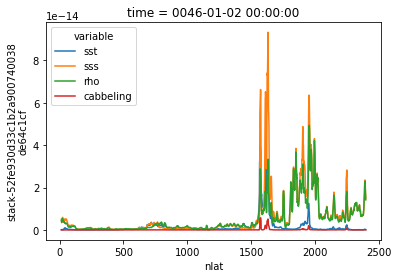

In [48]:
#Magnify the significant values by squaring to see if temp plays a bigger role than what we've seen in the above figs
(tendency_terms.isel(time=0)**2).mean('nlon').to_array().rolling(nlat=10).mean().plot.line(hue='variable');

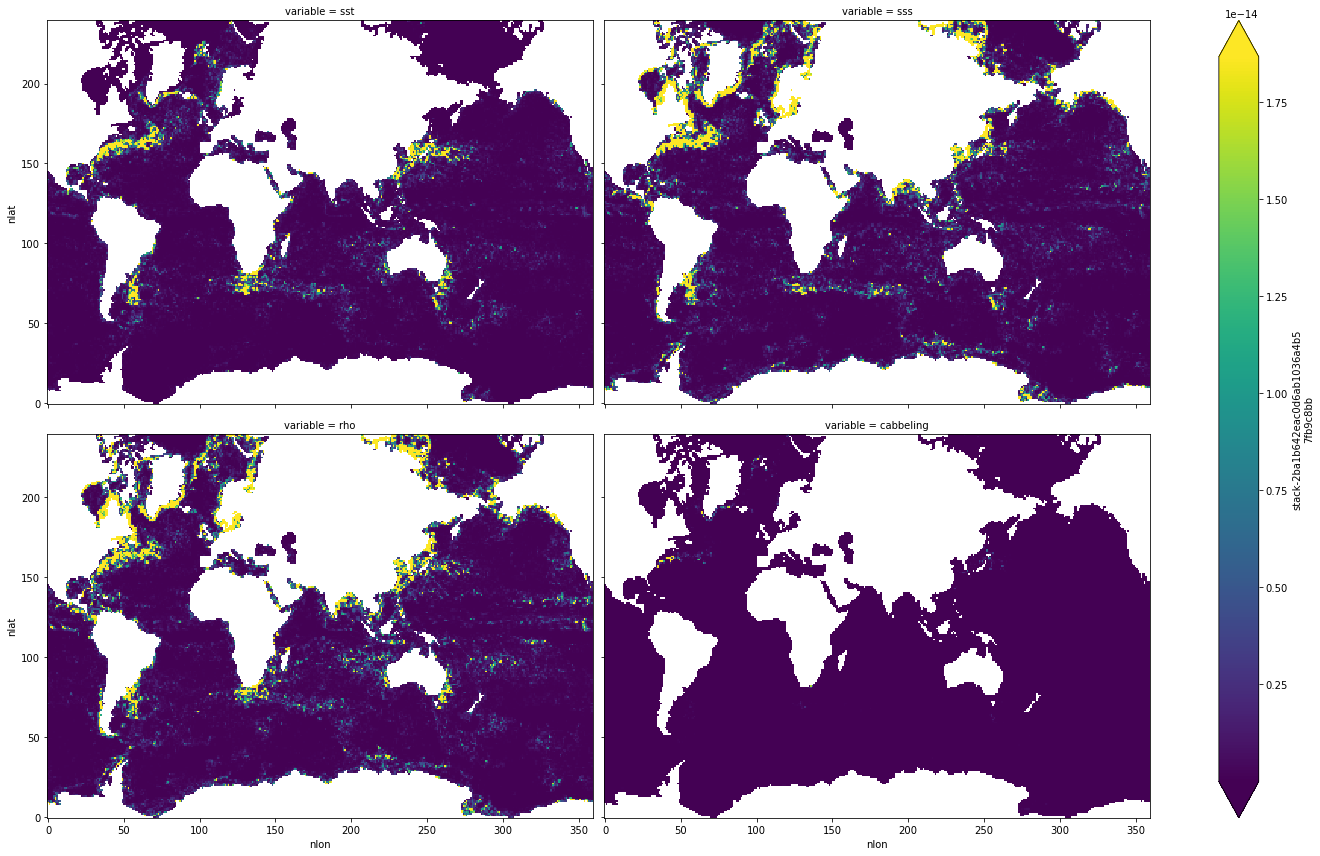

In [49]:
(tendency_terms.isel(time=0)**2).coarsen(nlon=10, 
                                         nlat=10).mean().to_array().plot(col='variable', 
                                                                         col_wrap=2, robust=True, 
                                                                         figsize=(20, 12))